**Table of contents**<a id='toc0_'></a>    
- [**Scatter Charts**](#toc1_)    
- [**Heatmap**](#toc2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=4
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [66]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
# Setting the default seaborn theme
sns.set_theme(style="darkgrid")

# Visualizing relations between two or more variables in a dataset

Relational charts are used for displaying multivariate data (data with two or more numeric variables) and understanding how variables in a dataset relate to each other and how those relationships depend on other variables. 

These  charts show how one or more variables relates to other variables.

**Note**: The data should be time independent.

- **Questions:**
1. Is the relationship positive, negative, or neither?
2. How are x and y related to each other?
3. What makes one group or cluster different from another?

- **Insight:** use to show - outliers, correlations, positive, and negative relationships among two or more variables.

- **Data:** two or more numeric variables.

- **Chart options:** scatterplot, scatterplot matrix, bubble chart, parallel coordinates, radar, bullet, and a heat map.


## <a id='toc1_'></a>[**Scatter Charts**](#toc0_)

`->` Some Common Types of Scatter Charts are,
    
1. **Scatterplot:** Usually scatterplots are used to show relationships between two variables (x, y) using a cloud of points, where each point represents an observation in the dataset. This allows us to infer if there are any meaningful relationship between the variables, at a glance.
    - Use to show positive or negative correlations, or linear and nonlinear relationships between  variables.
    - Labeling of every data point reduces readability but increases interpretation. So, label only a few that you want your audience to focus on.

2. **Scatterplot matrix:** Scatterplot matrices help identify a correlation between multiple variables. It makes it easy to observe the relationship between pairs of variables in one set of plots.

3. **Bubble chart:** A bubble chart is a scatterplot that shows relationships between three or four variables. 
    - The position of the bubble shows the relationship between the x and y variables.
    - The bubble size is based upon a numerical variable, such as population, or sales.
    - The bubble color is best reserved for categorical data, such as region.

    Bubble charts are best when the bubble sizes vary significantly.

`->` When to use Scatter Charts
- **To show** patterns in large sets of data, **linear or non-linear trends, correlations, clusters, or outliers**.
- **To compare** large number of data points **without regard to time**.
- To present relationships, but not exact values for comparisons.
- If the order of points in the dataset is not essential.

`->` When to avoid Scatter Charts
- If you have a **small dataset**.
- If the **values** in your dataset are **not correlated**.

`->` Tips for using Scatter Charts
- If applicable turn the horizontal axis into a logarithmic scale, thus showing the relationships between more widely distributed elements.

> `To draw` a scatter-plot in seaborn, we will use the `seaborn.relplot(data, x, y, kind='scatter')` function. 

The detailed documentation of the functionality can be found at, https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot.

In Seaborn these two-dimensional graphics (i.e, the scatter plots) can be enhanced by mapping up to `three additional variables` using the semantics of,

- `hue:` Grouping variable that will produce elements with different colors. Can be either categorical or numeric, although color mapping will behave differently in latter case.
- `size:` Grouping variable that will produce elements with different sizes. Can be either categorical or numeric, although size mapping will behave differently in latter case.
- `style:` Grouping variable that will produce elements with different styles. Can have a numeric dtype but will always be treated as categorical.

The relationship between x and y can be shown for different subsets of the data using the hue, size, and style parameters. These parameters control what visual semantics are used to identify the different subsets. 

<u> Function Parameters</u>

- `sizes`: An object that determines how sizes are chosen when size is used. List or dict arguments should provide a size for each unique data value, which forces a categorical interpretation. The argument may also be a min, max tuple.
- `row`, `col:` **Variables** that define subsets to plot on different facets.
- `col_wrap (int):` “Wrap” the column variable at this width, so that the column facets span multiple rows. Incompatible with a row facet.
- `palette:` string, list, dict, or matplotlib.colors.Colormap. Method for choosing the colors to use when mapping the hue semantic. See the documentation @https://seaborn.pydata.org/tutorial/color_palettes.html Or, to have a view of how each of the 170 available color maps looks see @https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f .

In [68]:
# Loading in an example dataset
resturant_tips = sns.load_dataset("tips")
resturant_tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/home/maidul/miniconda3/envs/ml_intro/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


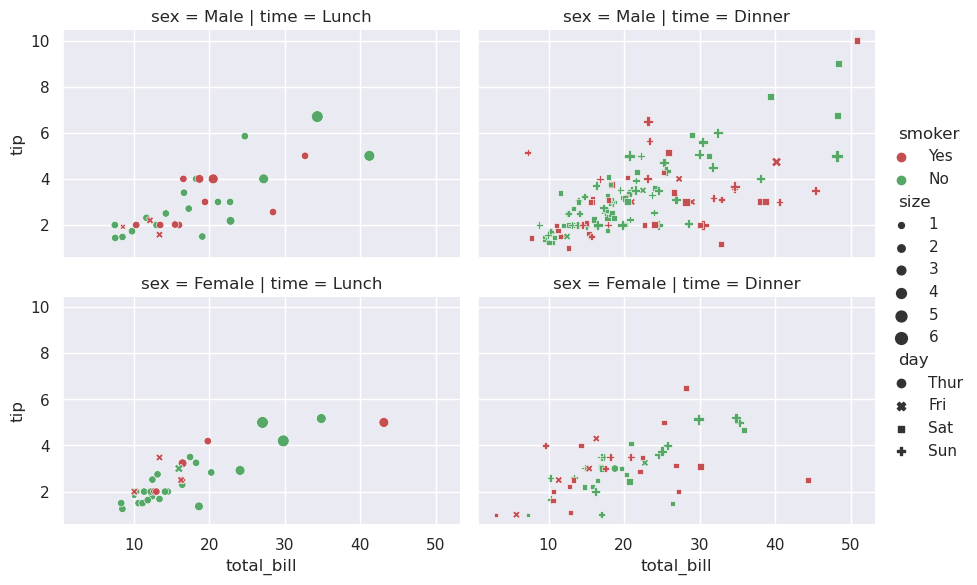

In [69]:
# exapmle of scatter plot
fig = sns.relplot(
    resturant_tips,
    kind="scatter",
    x="total_bill",
    y="tip",
    hue="smoker",
    palette=["r", "g"],
    style="day",
    size="size",
    row="sex",
    col="time",
    height=3,
    aspect=1.5,
)

#### Available modification methods for the FacetGrid object

In [70]:
type(fig)

seaborn.axisgrid.FacetGrid

In [71]:
[mod_method for mod_method in dir(fig) if mod_method.startswith("_") == False]

['add_legend',
 'apply',
 'ax',
 'axes',
 'axes_dict',
 'col_names',
 'data',
 'despine',
 'facet_axis',
 'facet_data',
 'fig',
 'figure',
 'hue_kws',
 'hue_names',
 'legend',
 'map',
 'map_dataframe',
 'pipe',
 'refline',
 'row_names',
 'savefig',
 'set',
 'set_axis_labels',
 'set_titles',
 'set_xlabels',
 'set_xticklabels',
 'set_ylabels',
 'set_yticklabels',
 'tick_params',
 'tight_layout']

## <a id='toc2_'></a>[**Heatmap**](#toc0_)

`->` A **heat map** is a graphical representation of a **table** of data. The individual values are arranged in a table matrix and represented by colors.

To represent more common values or higher activities brighter colors (usually, reddish colors) are used and to represent less common or activity values, darker colors are preferred. 

**The gradual change from one color to another depicts the relationship between the variables in the form of a color pattern (that is if theres any relationship at all).**

> Heatmaps in Seaborn can be plotted by using the `seaborn.heatmap()` function. See the documentation @https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap

<u>Function Parameters:</u>

- `data:` 2D dataset that can be coerced into an ndarray.
- `vmin, vmax:` Values to anchor the colormap, otherwise they are inferred from the data and other keyword arguments.
- `cmap:` The mapping from data values to color space. See the documentation @https://seaborn.pydata.org/tutorial/color_palettes.html Or, to have a view of how each of the 170 available color maps looks see @https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f .
- `center:` The value at which to center the colormap when plotting divergent data.
- `cbar:` Whether to draw a colorbar.
- `annot:` If True, write the data value in each cell.
- `fmt:` String formatting code to use when adding annotations.
- `linewidths:` Width of the lines that will divide each cell.
- `linecolor:` Color of the lines that will divide each cell.

In [72]:
# loading example dataset

In [73]:
mpg = sns.load_dataset("mpg")
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [74]:
mpg_1 = (
    mpg.pivot_table(
        index="model_year",
        values=["cylinders", "horsepower", "weight", "acceleration"],
        aggfunc="median",
    )
    .assign(weight=lambda df_: df_.weight / 1000)
    .rename({"weight": "weight (ton)"}, axis="columns")
)
mpg_1.head()

,acceleration,cylinders,horsepower,weight (ton)
model_year,,,,
70,12.5,8.0,150.0,3.4490
71,14.5,6.0,95.0,2.7980
72,14.5,4.0,104.5,2.9560
73,14.0,7.0,129.5,3.3385
74,16.0,4.0,88.0,2.4890


##### Plotting a heatmap

<Axes: ylabel='model_year'>

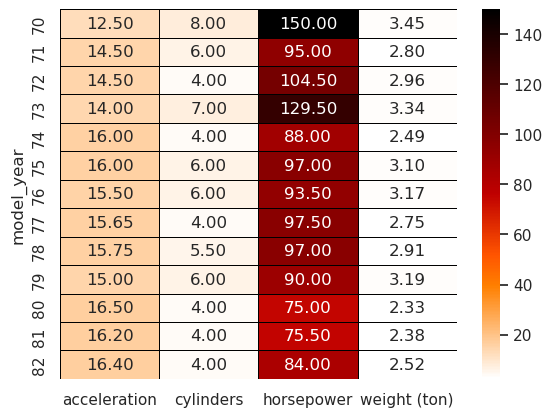

In [108]:
sns.heatmap(
    mpg_1,
    annot=True,
    fmt=".2f",
    cmap="gist_heat_r",
    linewidths=0.5,
    linecolor="Black",
)

`This heatmap doesn't make much sense.` There are two reasons for that:


1. If you think about it, Acceleration is mostly related to HP (Horsepower) than to a cars weight or number of cylinders. Also, HP is directly related to Cylinder numbers and is not to the Weight (The weight of a car does not directly determine the horsepower an engine produces. Instead, weight affects how efficiently the car can use the available horsepower to accelerate). In summation, it is your duty to understand the relation between different variables in your data before you go present them in front of someone else. Also when presenting to others consider mentioning that this heatmap is supposed to represent the correlation between these columns and discuss the direction of these relationships (positive or negative). Additionally, assess whether these correlations are statistically significant (remember that, *correlation doesn't mean causation*).

2. The HP column has very large values compared to the other columns. It's effect can be seen in all the columns of the heatmap. Especially in the Weight (Ton) column, all squares are white, and you can't deduce how it's related to other factors. Also, all the cells in the Acceleration column seems to be the same shade or orange (as a result the relationship between HP and acceleration isn't captured very well in the heatmap). All this is to say that, you need to be careful about the range of values each column represents and what it means for the other columns. In such situations it is a good choice to normalize/scale the data before presenting. Normalizing or scaling the data could help ensure that variables with different scales contribute equally to the analysis. Additionally, consider discussing the color scale used in the heatmap and also consider other analysis techniques like scatterplots or regression to gain a better understanding of the data relationships.

##### Plotting a correlation heatmap

In [109]:
mpg_corr = mpg_1.corr()

In [111]:
mpg_corr

,acceleration,cylinders,horsepower,weight (ton)
acceleration,1.000000,-0.765218,-0.910980,-0.767695
cylinders,-0.765218,1.000000,0.780206,0.871824
horsepower,-0.910980,0.780206,1.000000,0.803340
weight (ton),-0.767695,0.871824,0.803340,1.000000


<Axes: >

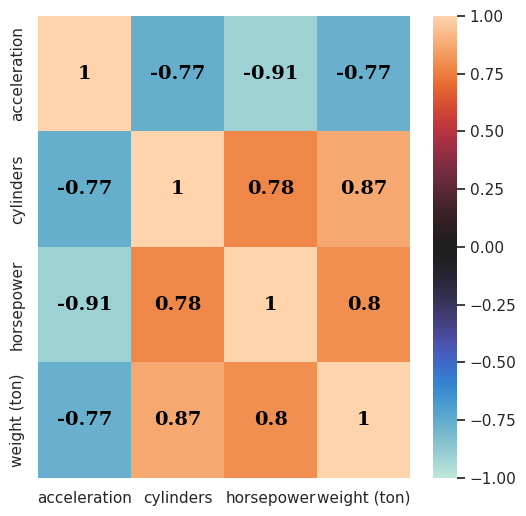

In [110]:
plt.figure(figsize=(6, 6))
sns.heatmap(
    mpg_corr,
    vmin=-1,
    vmax=1,
    center=0,
    annot=True,
    annot_kws={
        "fontsize": 14,
        "fontweight": "bold",
        "color": "black",
        "fontfamily": "serif",
    },
)

This correlation heatmap suggests that, Acceleration is negatively related to all 3 variables (which is true in a sense). But a large factor in that relationship is due to the fact that, with high cylinders count, the horsepower is high but it also increases the weight of car significantly.